# Unit 5 - Financial Planning


In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
# YOUR CODE HERE!
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Fetch current BTC price
# YOUR CODE HERE!
btc_response_data = requests.get(btc_url).json()
btc_price = btc_response_data["data"]["1"]["quotes"]["USD"]["price"]
print(f"The current price of BTC in US dollars is ${btc_price}")
# Fetch current ETH price
# YOUR CODE HERE!
eth_response_data = requests.get(eth_url).json()
eth_price = eth_response_data["data"]["1027"]["quotes"]["USD"]["price"]
print(f"The current price of ETH in US dollars is ${eth_price}")
# Compute current value of my crpto
# YOUR CODE HERE!
my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current price of BTC in US dollars is $36099.0
The current price of ETH in US dollars is $2353.78
The current value of your 1.2 BTC is $43318.80
The current value of your 5.3 ETH is $12475.03


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Current amount of shares
# YOUR CODE HERE!
my_agg = 200
my_spy = 50

In [7]:
# Set Alpaca API key and secret
# YOUR CODE HERE!
alpaca_api_key = os.getenv("ALPACA_API_Key")
alpaca_secret_key = os.getenv("Alpaca_secret_key")

# Create the Alpaca API object
# YOUR CODE HERE!
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2"
)

In [8]:
# Format current date as ISO format
# YOUR CODE HERE!
start_date = pd.Timestamp("2021-05-20", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2021-05-20", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# YOUR CODE HERE!
retirement_data = api.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000,
).df

# Preview DataFrame
# YOUR CODE HERE!
retirement_data.head()

AGG                                    SPY  \
                             open   high     low   close   volume   open   
time                                                                       
2021-05-20 00:00:00-04:00  114.08  114.3  114.08  114.29  5647134  411.8   

                                                              
                              high     low   close    volume  
time                                                          
2021-05-20 00:00:00-04:00  416.625  411.67  415.24  69427475

In [13]:
# Pick AGG and SPY close prices
# YOUR CODE HERE!
agg_close_price = retirement_data.iat[0,3]
spy_close_price = retirement_data.iat[0,8]

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $114.29
Current SPY closing price: $415.24


In [14]:
# Compute the current value of shares
# YOUR CODE HERE!
my_spy_value = my_spy * agg_close_price
my_agg_value = my_agg * spy_close_price

# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $5714.50
The current value of your 200 AGG shares is $83048.00


### Savings Health Analysis

In [20]:
# Set monthly household income
# YOUR CODE HERE!
monthly_income = 12000

# Create savings DataFrame
# YOUR CODE HERE!
total_crypto_val = my_btc_value + my_eth_value
total_share_value = my_agg_value + my_spy_value
amounts_data = {
    "amounts": [total_crypto_val, total_share_value]
}
investments = ["Crypto", "Shares"]
df_savings = pd.DataFrame(amounts_data, index=investments)

# Display savings DataFrame
display(df_savings)

amounts
Crypto  55793.834
Shares  88762.500

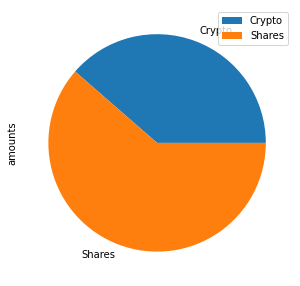

In [22]:
# Plot savings pie chart
# YOUR CODE HERE!
plot = df_savings.plot.pie(y='amounts', figsize=(5, 5))

In [23]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
# YOUR CODE HERE!
total_savings = total_crypto_val + total_share_value

# Validate saving health
# YOUR CODE HERE!
if total_savings >= emergency_fund:
    print('Congratulations, you have more than enough money in your emergency fund!')
elif total_savings == emergency_fund:
    print('Congratulations, you have reached your emergency fund goal!')
else:
    print('Keep saving to get to your emergency fund goal')

Congratulations, you have more than enough money in your emergency fund!


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [45]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date1 = pd.Timestamp('2016-05-20', tz='America/New_York').isoformat()
end_date2 = pd.Timestamp('2021-05-20', tz='America/New_York').isoformat()

In [46]:
# Get 5 years' worth of historical data for SPY and AGG
# YOUR CODE HERE!
df_stock_data = api.get_barset(
    tickers,
    timeframe,
    start=start_date1,
    end=end_date2,
    limit=1000,
).df
# Display sample data
df_stock_data.head()

AGG                                       \
                             open    high       low   close     volume   
time                                                                     
2017-05-31 00:00:00-04:00  109.64  109.81  109.6400  109.75  2011554.0   
2017-06-01 00:00:00-04:00  109.36  109.50  109.3409  109.47  2241270.0   
2017-06-02 00:00:00-04:00  109.74  109.89  109.7047  109.84  1322101.0   
2017-06-05 00:00:00-04:00  109.66  109.74  109.6000  109.66  2074161.0   
2017-06-06 00:00:00-04:00  109.87  109.95  109.8100  109.87  1434088.0   

                              SPY                                       
                             open    high     low    close      volume  
time                                                                    
2017-05-31 00:00:00-04:00     NaN     NaN     NaN      NaN         NaN  
2017-06-01 00:00:00-04:00  241.96  243.34  241.64  243.320  50837868.0  
2017-06-02 00:00:00-04:00  243.41  244.35  243.08  244.130  50298878.0  
2017-06-05 00:00:00-04:00  243.98  244.30  243.76  243.965  27596403.0  
2017-06-06 00:00:00-04:00  243.31  243.98  243.12  243.250  36562468.0

In [47]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
MC_dist_1 = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [48]:
# Printing the simulation input data
# YOUR CODE HERE!
MC_dist_1.portfolio_data.head()

AGG                                       \
                             open    high       low   close     volume   
time                                                                     
2017-05-31 00:00:00-04:00  109.64  109.81  109.6400  109.75  2011554.0   
2017-06-01 00:00:00-04:00  109.36  109.50  109.3409  109.47  2241270.0   
2017-06-02 00:00:00-04:00  109.74  109.89  109.7047  109.84  1322101.0   
2017-06-05 00:00:00-04:00  109.66  109.74  109.6000  109.66  2074161.0   
2017-06-06 00:00:00-04:00  109.87  109.95  109.8100  109.87  1434088.0   

                                           SPY                           \
                          daily_return    open    high     low    close   
time                                                                      
2017-05-31 00:00:00-04:00          NaN     NaN     NaN     NaN      NaN   
2017-06-01 00:00:00-04:00    -0.002551  241.96  243.34  241.64  243.320   
2017-06-02 00:00:00-04:00     0.003380  243.41  244.35  243.08  244.130   
2017-06-05 00:00:00-04:00    -0.001639  243.98  244.30  243.76  243.965   
2017-06-06 00:00:00-04:00     0.001915  243.31  243.98  243.12  243.250   

                                                    
                               volume daily_return  
time                                                
2017-05-31 00:00:00-04:00         NaN          NaN  
2017-06-01 00:00:00-04:00  50837868.0          NaN  
2017-06-02 00:00:00-04:00  50298878.0     0.003329  
2017-06-05 00:00:00-04:00  27596403.0    -0.000676  
2017-06-06 00:00:00-04:00  36562468.0    -0.002931

In [49]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
MC_dist_1.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

0         1         2          3         4         5          6    \
0      1.000000  1.000000  1.000000   1.000000  1.000000  1.000000   1.000000   
1      1.005041  1.005907  1.003320   1.001047  0.981211  1.012173   1.002922   
2      0.998718  0.991564  0.989523   1.001016  0.983212  1.006452   1.017749   
3      0.989131  0.988183  0.992800   0.997718  0.979703  1.003314   1.013862   
4      0.987715  0.990098  0.992266   0.998816  0.976011  1.011744   1.021058   
...         ...       ...       ...        ...       ...       ...        ...   
7556  21.311142  7.437319  8.524514  37.318852  5.580007  8.213293  19.840904   
7557  21.387692  7.399862  8.431332  37.579941  5.605977  8.133870  20.199704   
7558  21.332896  7.437052  8.512310  37.430673  5.671149  8.168462  20.231714   
7559  21.173919  7.503471  8.419426  37.436536  5.664225  8.224064  20.155271   
7560  21.257305  7.543826  8.349533  37.757404  5.684987  8.143660  20.067873   

           7         8         9    ...        490        491        492  \
0     1.000000  1.000000  1.000000  ...   1.000000   1.000000   1.000000   
1     0.998527  0.985295  0.987907  ...   1.001597   1.005777   1.004315   
2     0.995713  1.006377  0.982117  ...   0.996690   1.007907   0.996243   
3     0.989402  1.003167  0.984628  ...   1.005318   1.020780   1.002699   
4     0.982752  1.009331  0.987209  ...   1.014560   1.018778   1.002058   
...        ...       ...       ...  ...        ...        ...        ...   
7556  8.379636  7.918571  8.691887  ...  23.841456  12.237038  42.706973   
7557  8.400635  7.786792  8.711178  ...  23.977627  12.213765  42.535631   
7558  8.459554  7.851678  8.687711  ...  24.077146  12.193482  42.755908   
7559  8.445656  7.891439  8.670877  ...  24.042177  12.131219  42.790327   
7560  8.466463  7.954646  8.684568  ...  24.157627  12.022643  42.656877   

            493       494        495        496        497        498  \
0      1.000000  1.000000   1.000000   1.000000   1.000000   1.000000   
1      0.990502  0.987216   0.978427   0.984571   1.003560   0.991963   
2      1.000923  0.985625   0.972678   0.978966   1.006957   0.997649   
3      0.998387  0.988314   0.976513   0.970992   1.011181   1.000632   
4      0.988184  0.978486   0.976160   0.976776   0.993320   0.992942   
...         ...       ...        ...        ...        ...        ...   
7556  19.180837  4.761730  24.198484  21.980015  12.350188  10.409555   
7557  19.070144  4.799041  24.211212  22.147542  12.417024  10.303551   
7558  19.222421  4.752537  24.185377  22.401020  12.252567  10.397469   
7559  19.480235  4.683511  23.678844  22.403146  12.239858  10.615409   
7560  19.704245  4.677713  23.475103  22.367216  12.380182  10.695530   

            499  
0      1.000000  
1      0.983502  
2      0.977313  
3      0.983287  
4      0.981511  
...         ...  
7556  19.478538  
7557  19.362150  
7558  19.304055  
7559  19.540299  
7560  19.509811  

[7561 rows x 500 columns]

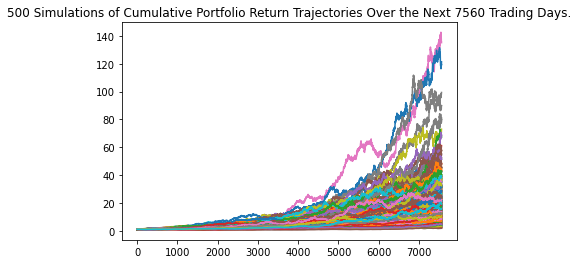

In [50]:
# Plot simulation outcomes
# YOUR CODE HERE!
line_plot = MC_dist_1.plot_simulation()

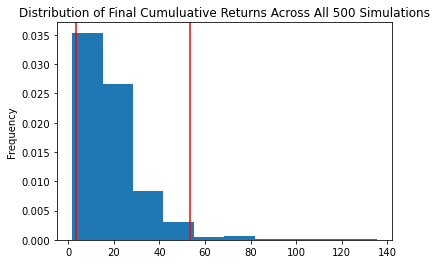

In [51]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
dist_plot = MC_dist_1.plot_distribution()

### Retirement Analysis

In [52]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
tbl = MC_dist_1.summarize_cumulative_return()
# Print summary statistics
# YOUR CODE HERE!
print(tbl)

count           500.000000
mean             19.211333
std              14.889647
min               1.720410
25%              10.140124
50%              15.722374
75%              23.714738
max             135.194706
95% CI Lower      3.491376
95% CI Upper     53.592044
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [53]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# YOUR CODE HERE!
ci_lower = round(tbl[8]*20000,2)
ci_upper = round(tbl[9]*20000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $69827.51 and $1071840.88


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [61]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# YOUR CODE HERE!
ci_lower_1 = round(tbl[8]*30000,2)
ci_upper_1 = round(tbl[9]*30000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower_1} and ${ci_upper_1}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $104741.27 and $1607761.31


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [55]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!
MC_dist_2 = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [56]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!
MC_dist_2.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

0         1         2         3         4         5         6    \
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1     1.002890  1.008535  1.009172  1.001060  1.000195  1.009527  0.995382   
2     1.003053  1.002039  1.021056  1.022684  1.001030  1.013077  0.999066   
3     0.999931  1.006008  1.019009  1.030181  1.002116  1.012067  1.004536   
4     0.999499  1.010605  1.023726  1.026582  1.007017  1.007951  1.009113   
...        ...       ...       ...       ...       ...       ...       ...   
1256  0.883576  1.489458  1.110464  0.991892  2.422291  1.411792  1.459131   
1257  0.882902  1.496367  1.126905  0.999474  2.429659  1.393630  1.482496   
1258  0.881192  1.494638  1.110854  0.992167  2.426400  1.372173  1.490672   
1259  0.893868  1.498388  1.115611  0.994552  2.413809  1.360517  1.497473   
1260  0.898793  1.484628  1.117727  1.008265  2.416318  1.356962  1.498427   

           7         8         9    ...       490       491       492  \
0     1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000   
1     0.998826  1.003093  0.999538  ...  0.996745  0.991215  1.000550   
2     0.994217  1.006173  0.994191  ...  1.005324  1.007587  0.998263   
3     0.996558  0.999871  0.992841  ...  1.008859  1.022671  0.997239   
4     0.995397  0.989390  0.996299  ...  1.009888  1.029397  0.988038   
...        ...       ...       ...  ...       ...       ...       ...   
1256  1.556638  1.370492  1.809901  ...  1.485217  1.456952  1.763811   
1257  1.568860  1.355759  1.815432  ...  1.495281  1.488431  1.741655   
1258  1.549275  1.354969  1.796668  ...  1.483874  1.480604  1.739387   
1259  1.549841  1.334851  1.794967  ...  1.491830  1.488507  1.730393   
1260  1.561818  1.319258  1.818470  ...  1.491490  1.503429  1.757057   

           493       494       495       496       497       498       499  
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
1     1.006709  0.994560  1.007460  1.006287  1.004962  1.013947  0.999641  
2     1.020887  0.994627  1.001977  1.007898  1.008947  1.031063  0.999311  
3     1.019534  0.989125  1.010789  0.998595  1.009584  1.025108  1.005978  
4     1.011700  0.976972  1.014558  1.008952  1.010905  1.030478  1.007392  
...        ...       ...       ...       ...       ...       ...       ...  
1256  1.638244  1.893170  1.655535  0.932507  2.176483  0.792977  0.965852  
1257  1.636993  1.892813  1.649876  0.927851  2.173756  0.794420  0.952303  
1258  1.661918  1.903320  1.654979  0.932586  2.132298  0.809383  0.948213  
1259  1.658551  1.902130  1.687530  0.941419  2.129798  0.804566  0.948054  
1260  1.664066  1.919674  1.715512  0.947141  2.112052  0.802370  0.951212  

[1261 rows x 500 columns]

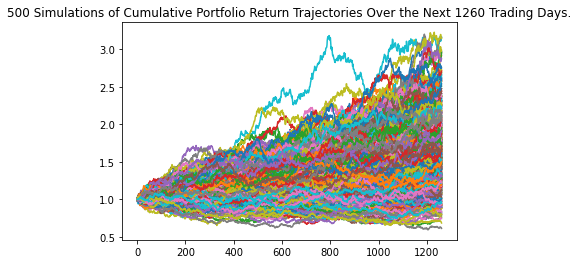

In [57]:
# Plot simulation outcomes
# YOUR CODE HERE!
line_plot = MC_dist_2.plot_simulation()

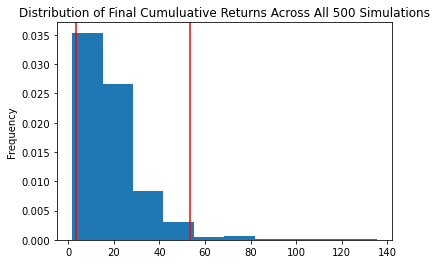

In [58]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
dist_plot = MC_dist_1.plot_distribution()

In [59]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
five_yr_tbl = MC_dist_2.summarize_cumulative_return()
# Print summary statistics
# YOUR CODE HERE
print(five_yr_tbl)

count           500.000000
mean              1.620137
std               0.473566
min               0.614311
25%               1.270069
50%               1.573935
75%               1.897812
max               3.164360
95% CI Lower      0.877940
95% CI Upper      2.701041
Name: 1260, dtype: float64


In [62]:
# Set initial investment
# YOUR CODE HERE!
initial_investment = 60000
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!
ci_lower_five = round(five_yr_tbl[8]*60000,2)
ci_upper_five = round(five_yr_tbl[9]*60000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $52676.37 and $162062.45


### Ten Years Retirement Option

In [63]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!
MC_dist_3 = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*10
)

In [64]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!
MC_dist_3.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

0         1         2         3         4         5         6    \
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1     1.011271  1.019859  1.005174  0.999530  0.996743  1.010082  1.005879   
2     1.011617  1.040783  1.003004  0.996989  1.003107  1.003162  1.003689   
3     1.003860  1.045696  1.010174  1.005468  1.011194  1.001773  1.007932   
4     1.003969  1.050079  1.021875  1.012631  1.017717  1.003875  1.007034   
...        ...       ...       ...       ...       ...       ...       ...   
2516  1.539689  3.787730  2.014774  2.388710  1.797956  1.967205  3.059760   
2517  1.528755  3.827102  2.055157  2.418147  1.817184  1.973053  3.040533   
2518  1.512245  3.820787  2.061397  2.414062  1.805732  1.960539  3.011305   
2519  1.510996  3.827795  2.037182  2.429229  1.809424  1.981643  2.971738   
2520  1.498622  3.877808  2.037992  2.406639  1.829508  1.968707  2.968348   

           7         8         9    ...       490       491       492  \
0     1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000   
1     1.001845  1.003905  0.996467  ...  1.001159  1.004326  1.003992   
2     1.000262  0.986698  0.992617  ...  0.995841  0.998062  1.005680   
3     1.007595  0.987809  0.995725  ...  0.988860  0.995771  1.007471   
4     0.999370  0.983429  0.996087  ...  0.987851  1.001325  1.015928   
...        ...       ...       ...  ...       ...       ...       ...   
2516  3.010865  2.416714  2.014354  ...  2.835013  3.395752  2.514521   
2517  2.991522  2.386338  2.021989  ...  2.894841  3.402113  2.526265   
2518  3.005906  2.418292  2.010475  ...  2.850995  3.404053  2.539890   
2519  3.009653  2.436961  2.014864  ...  2.867604  3.446545  2.547160   
2520  3.031270  2.416177  2.047662  ...  2.828988  3.448462  2.547769   

           493       494       495       496       497       498       499  
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
1     0.992255  0.987160  0.992010  0.998823  0.994641  0.999293  1.002836  
2     0.993789  0.980991  0.993577  1.004777  1.005453  0.997627  1.016265  
3     1.001608  0.986382  0.991946  1.012128  1.012308  1.000381  1.009419  
4     1.001009  0.982882  0.971962  1.023033  1.013514  1.003854  1.013629  
...        ...       ...       ...       ...       ...       ...       ...  
2516  2.334898  1.385935  1.728201  2.549248  3.973753  2.185167  1.420082  
2517  2.337083  1.374483  1.748347  2.578048  4.005096  2.195818  1.408213  
2518  2.336061  1.374953  1.766239  2.576744  4.050872  2.226361  1.407975  
2519  2.343436  1.381528  1.774625  2.588669  4.068749  2.218839  1.426983  
2520  2.356843  1.376449  1.775143  2.592586  4.077636  2.222559  1.429670  

[2521 rows x 500 columns]

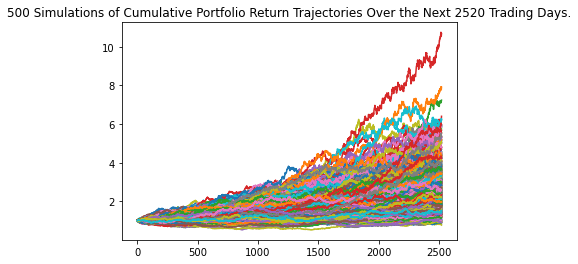

In [65]:
# Plot simulation outcomes
# YOUR CODE HERE!
plot = MC_dist_3.plot_simulation()

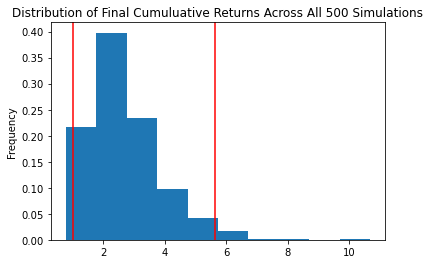

In [66]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
dist_plot = MC_dist_3.plot_distribution()

In [67]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
ten_year_tbl = MC_dist_3.summarize_cumulative_return()
# Print summary statistics
# YOUR CODE HERE!
print(ten_year_tbl)

count           500.000000
mean              2.701508
std               1.200440
min               0.778909
25%               1.849848
50%               2.469401
75%               3.297865
max              10.682844
95% CI Lower      1.018576
95% CI Upper      5.624944
Name: 2520, dtype: float64


In [68]:
# Set initial investment
# YOUR CODE HERE!
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!
ci_lower_ten = round(five_yr_tbl[8]*60000,2)
ci_upper_ten = round(five_yr_tbl[9]*60000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $52676.37 and $162062.45
